In [3]:
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

from mtcnn import MTCNN
import cv2
import glob
import pandas as pd
from keras.utils.vis_utils import plot_model
import json 
from PIL import Image
import numpy as np
import time

from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
import random

from keras.applications import VGG16
from keras.layers import Dense
from keras.engine.training import Model
#from keras import backend as K
from tensorflow.keras import backend as K
import gc
import tensorflow as tf 
from tensorflow.compat.v1 import Session, RunOptions

Using TensorFlow backend.


In [4]:
# https://stackoverflow.com/questions/44036971/multiple-outputs-in-keras

# Import Photos To Json Summary

In [5]:
def Summary(directory):
    data = []
    for file in glob.glob("{}*.jpg".format(directory)):
        # from the file name, determine properties:
        params = file.replace(directory,'').split('_')

        # determine gender
        gender = 'male'
        if params[1] == '1':
            gender = 'female'
        
        # determine ethnicity
        ethnicity = 'white'
        if params[2] == '1':
            ethnicity = 'black'
        if params[2] == '2':
            ethnicity = 'asian'
        if params[2] == '3':
            ethnicity = 'indian'
        if params[2] == '4':
            ethnicity = 'other'
        
        # generate dataframe row 
        data.append({
            'age' : int(params[0]),
            'gender' : gender,
            'ethnicity' : ethnicity,
            'filename' : file
        })
    return pd.DataFrame(data)

In [6]:
# Build Database
start = time.time()
# read images into list 
print('Summary 3...')
directory = 'D:\\Downloads\\Faces\\part3.tar\\part3\\'
summary3 = Summary(directory)

print('Summary 2...')
directory = 'D:\\Downloads\\Faces\\part3.tar\\part2\\'
summary2 = Summary(directory)

print('Summary 1...')
directory = 'D:\\Downloads\\Faces\\part3.tar\\part1\\'
summary1 = Summary(directory)
print('time taken: {} minutes'.format((time.time() - start)/60))

Summary 3...
Summary 2...
Summary 1...
time taken: 0.003482202688852946 minutes


In [16]:
len(summary3)

3250

In [7]:
summary = summary1.append(summary2).append(summary3) # merge directories into one list

In [8]:
summary.shape

(24106, 4)

In [20]:
summary = summary3

# Statistics 

In [9]:
df = summary
df.shape

(24106, 4)

In [10]:
# Gender
male = df[df['gender'] == 'male'].shape[0]
female = df[df['gender'] == 'female'].shape[0]

print('male: {}'.format(male))
print('female: {}'.format(female))
print('ratio: {}'.format(male/(female+male)))
# ax = df['gender'].plot.hist(rot=0, bins=20)

male: 12583
female: 11523
ratio: 0.5219862274952294


In [11]:
# Ethnicity
white = df[df['ethnicity'] == 'white'].shape[0]
black = df[df['ethnicity'] == 'black'].shape[0]
asian = df[df['ethnicity'] == 'asian'].shape[0]
indian = df[df['ethnicity'] == 'indian'].shape[0]
other = df[df['ethnicity'] == 'other'].shape[0]

print('white: {}'.format(white))
print('black: {}'.format(black))
print('asian: {}'.format(asian))
print('indian: {}'.format(indian))
print('other: {}'.format(other))
# ax = df['ethnicity'].plot.hist(rot=0, bins=20)

white: 10225
black: 4558
asian: 3586
indian: 4027
other: 1710


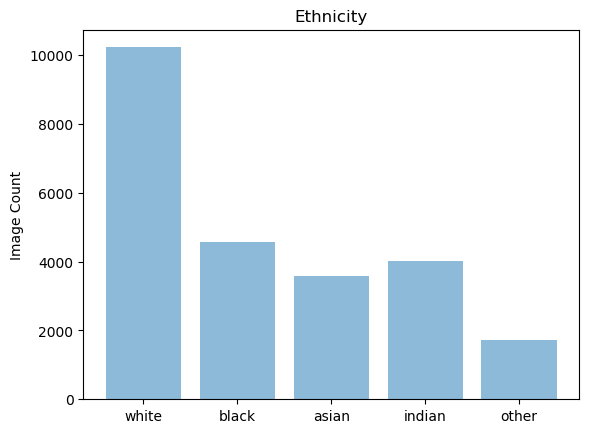

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('white', 'black', 'asian', 'indian', 'other')
y_pos = np.arange(len(objects))
performance = [white,black,asian,indian,other]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Image Count')
plt.title('Ethnicity')

plt.show()

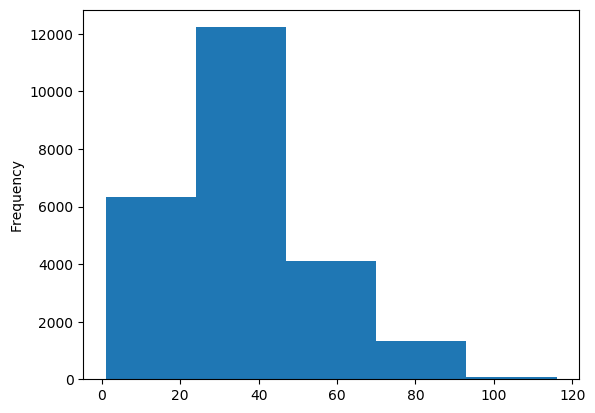

In [13]:
# Age distribution 
ax = df['age'].plot.hist(rot=0, bins=5)

# Rebalance the data 

In [16]:
# remove ages above 80 (optliers), merge into 80+ category 
# close age range? 

# Oversampling

# Undersampling

# weighting